In [1]:
import pandas as pd
import numpy as np
import string as st
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
# set a seaborn style
sns.set_style("whitegrid")

# Read Data

In [2]:
#read data
data = pd.read_csv("C:/Users/Rabi/Documents/Data_Science/upgrad/SEDA/uber_supply_demand/Uber Request Data.csv")
#Taking a glimpse
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


# Addressing Data Quality issues

In [3]:
print("Exploring candidates for factor variable")
data.apply(lambda x: len(x.unique()))

Exploring candidates for factor variable


Request id           6745
Pickup point            2
Driver id             301
Status                  3
Request timestamp    5618
Drop timestamp       2599
dtype: int64

In [4]:
print("converting Pickup point and Status to category/factors")
data["Pickup point"] = data["Pickup point"].astype('category')
data["Status"] = data["Status"].astype('category')
print(data["Pickup point"].value_counts())
print("")
print(data["Status"].value_counts())

converting Pickup point and Status to category/factors
City       3507
Airport    3238
Name: Pickup point, dtype: int64

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64


# Exploring missing values

Exploring missing values
Request id           0.000000
Pickup point         0.000000
Driver id            0.392884
Status               0.000000
Request timestamp    0.000000
Drop timestamp       0.580282
dtype: float64


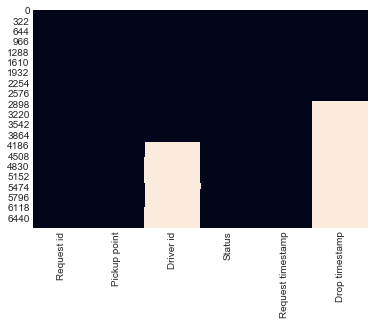

In [5]:
#Exploring missing values
print("Exploring missing values")
sns.heatmap(data.isnull(), cbar=False)
print(data.isnull().sum()/len(data))

Checking if missingness has something to do with the success or filure of the service request

In [6]:
print("checking if this has something to do with the success or filure of the service request")
print(data.Status[data["Driver id"].isnull()].unique())
print(data.Status[data["Drop timestamp"].isnull()].unique())

checking if this has something to do with the success or filure of the service request
[No Cars Available]
Categories (1, object): [No Cars Available]
[Cancelled, No Cars Available]
Categories (2, object): [Cancelled, No Cars Available]


In [7]:
print("looking for a sample data slice to identify any other data quality issue")
data.sample(10)

looking for a sample data slice to identify any other data quality issue


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
171,3943,Airport,18.0,Trip Completed,13-07-2016 22:35:38,13-07-2016 23:33:20
6438,6202,Airport,NaN,No Cars Available,15-07-2016 17:22:39,NaN
6144,5331,Airport,NaN,No Cars Available,14-07-2016 22:20:30,NaN
6360,6048,City,NaN,No Cars Available,15-07-2016 13:29:51,NaN
3989,1228,City,276.0,Cancelled,11/7/2016 21:37,NaN
1774,4031,City,186.0,Trip Completed,14-07-2016 00:22:54,14-07-2016 00:55:13
511,2894,City,52.0,Trip Completed,13-07-2016 06:01:37,13-07-2016 07:13:57
389,4735,City,39.0,Trip Completed,14-07-2016 14:43:10,14-07-2016 15:51:37
2848,3230,City,5.0,Cancelled,13-07-2016 10:01:57,NaN
4225,509,City,NaN,No Cars Available,11/7/2016 9:42,NaN


In [8]:
print("date format in request time and drop time looks in-consistent. Leys check them individually. Lets confirm")
print(data["Request timestamp"].sample(10))
print("")
print(data["Drop timestamp"].sample(10))

date format in request time and drop time looks in-consistent. Leys check them individually. Lets confirm
0        11/7/2016 11:51
1        11/7/2016 17:57
2         12/7/2016 9:17
3        12/7/2016 21:08
4    13-07-2016 08:33:16
5    13-07-2016 21:57:28
6    14-07-2016 06:15:32
7    15-07-2016 05:11:52
8    15-07-2016 17:57:27
9         11/7/2016 6:46
Name: Request timestamp, dtype: object

0        11/7/2016 13:00
1        11/7/2016 18:47
2         12/7/2016 9:58
3        12/7/2016 22:03
4    13-07-2016 09:25:47
5    13-07-2016 22:28:59
6    14-07-2016 07:13:15
7    15-07-2016 06:07:52
8    15-07-2016 18:50:51
9         11/7/2016 7:25
Name: Drop timestamp, dtype: object


In [9]:
print("making dates consistent")
data["Request timestamp"] = pd.to_datetime(data["Request timestamp"],dayfirst=True)
data["Drop timestamp"] = pd.to_datetime(data["Drop timestamp"],dayfirst=True)
print(data["Request timestamp"].sample(10))
print("")
print(data["Drop timestamp"].sample(10))

making dates consistent
0   2016-07-11 11:51:00
1   2016-07-11 17:57:00
2   2016-07-12 09:17:00
3   2016-07-12 21:08:00
4   2016-07-13 08:33:16
5   2016-07-13 21:57:28
6   2016-07-14 06:15:32
7   2016-07-15 05:11:52
8   2016-07-15 17:57:27
9   2016-07-11 06:46:00
Name: Request timestamp, dtype: datetime64[ns]

0   2016-07-11 13:00:00
1   2016-07-11 18:47:00
2   2016-07-12 09:58:00
3   2016-07-12 22:03:00
4   2016-07-13 09:25:47
5   2016-07-13 22:28:59
6   2016-07-14 07:13:15
7   2016-07-15 06:07:52
8   2016-07-15 18:50:51
9   2016-07-11 07:25:00
Name: Drop timestamp, dtype: datetime64[ns]


# Formulate business questions
Lets formualte business questions:
1. Is there a Demand Supply Gap?
2. How big is the Gap?
3. Given the data, which events contribute to Gap and to what extent?
4. How does the Gap vary across given factors like Pick UP location, time of the day.
5. Recommendarion to the management to address the Gap


In [100]:
#new feature creation to lump failed cases togahter and arrive at metric Overall Fail Rate
print("Each row of the data set is a service request . A service request is a success when the trip gets completed. In other words, when a demand is met. Creating a new feature supply to denote whether a service request was succesfull.")
data['supply'] = np.nan
data['supply'] = ['sucess' if x == 'Trip Completed' else 'fail' for x in data["Status"]]

Each row of the data set is a service request . A service request is a success when the trip gets completed. In other words, when a demand is met. Creating a new feature supply to denote whether a service request was succesfull.


# Perform EDA

Is there a Demand Supply Gap and if there is how big?
fail      3914
sucess    2831
Name: supply, dtype: int64
fail      0.580282
sucess    0.419718
Name: supply, dtype: float64


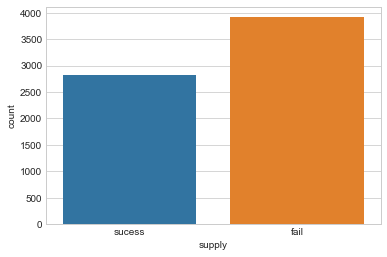

In [101]:
#STart of EDA though Descriptive Statistcs and Plots
print("Is there a Demand Supply Gap and if there is how big?")
print(data.supply.value_counts())
print(data.supply.value_counts()/len(data.supply))
sns.countplot(x="supply", data=data)
plt.show()

There is indeed a Gap and its significant. The overall fail rate is 58% i.e 58% the pick up request are not met. Given the data, which events contribute to Gap and to what extent?

In [ ]:
There is indeed a Gap and its significant. The overall fail rate is 58% i.e 58% the pick up request are not met. Given the data, which events contribute to Gap and to what extent

Checking if the fail rate is significanlty diffrent across pick points


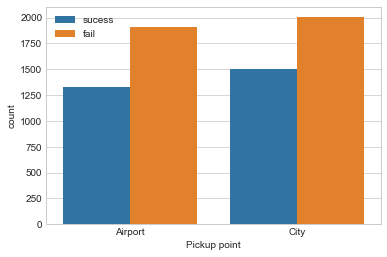

Checking the nature of the fails
supply  Status           
fail    Cancelled            0.32
        No Cars Available    0.68
sucess  Trip Completed       1.00
Name: supply, dtype: float64



In [103]:
print("Checking if the fail rate is significanlty diffrent across pick points")
sns.countplot(x="Pickup point", data=data, hue= "supply")
plt.legend(loc = "upper left")
plt.show()
print("Checking the nature of the fails")
print(round(data.groupby(["supply", "Status"]).supply.count()/data.groupby(["supply"]).supply.count(), 2))
print("")

From the plot above Its difficult to say that Pick point influnces whether service request is a success or failure.
in general the effect of Pick up point seems nuetral. 
We will explore later if this changes when we consider other factors along with Pick up point. 

We also see that around 68% of the Fail cases are due to non-availability of cars.

Lest explore the Fail rate throught the day. We create a derived metric fail_rate.

C:\Users\Rabi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Demand Distribution Overall')

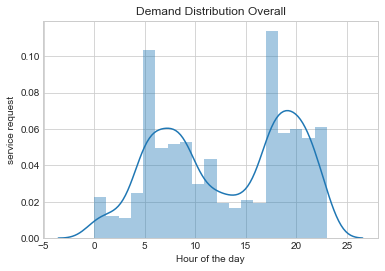

In [166]:
data['Request_hour'] = np.nan
data['Request_hour']  = data["Request timestamp"].dt.hour
sns.distplot(data['Request_hour'])
plt.ylabel("service request")
plt.xlabel("Hour of the day")
plt.title("Demand Distribution Overall")

C:\Users\Rabi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rabi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Demand Distribution City')

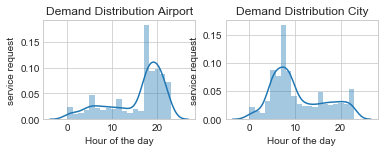

In [165]:
#subsetting Airport pick up data
data_airport = data[data["Pickup point"] == "Airport"]
#subsetting city pick up data
data_city = data[data["Pickup point"] == "City"]

#Plotting Fail rate and demand distribution across Pick up point and hours of the day
plt.subplot(2, 2, 1)
sns.distplot(data_airport['Request_hour'])
plt.ylabel("service request")
plt.xlabel("Hour of the day")
plt.title("Demand Distribution Airport")
plt.subplot(2, 2, 2)
sns.distplot(data_city['Request_hour'])
plt.ylabel("service request")
plt.xlabel("Hour of the day")
plt.title("Demand Distribution City")

In [ ]:
data['supply_bool'] = np.nan
data['supply_bool'] = (data["supply"] == "fail")
print("Plotting fail rate")

Request_hour
0     0.60
1     0.71
2     0.63
3     0.63
4     0.62
5     0.58
6     0.58
7     0.57
8     0.63
9     0.60
10    0.52
11    0.33
12    0.34
13    0.44
14    0.35
15    0.40
16    0.43
17    0.64
18    0.68
19    0.65
20    0.67
21    0.68
22    0.49
23    0.47
Name: supply_bool, dtype: float64


C:\Users\Rabi\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


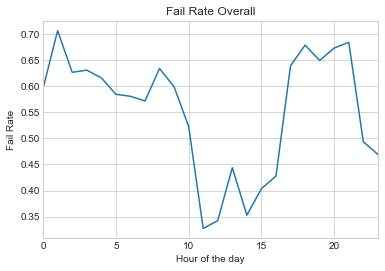

In [143]:
time_df_all = data.groupby(["Request_hour"]).supply_bool.mean()
print(round(time_df_all, 2))
sns.tsplot(data=time_df_all)
plt.ylabel("Fail Rate")
plt.xlabel("Hour of the day")
plt.title("Fail Rate Overall")
plt.show()

1. We see that the Fail Rate is highest in late night
2. The Fail comes down but stays relatively high during early hours. Fail rate is also high during evening 6 to late eveninig 9. This also coincides with the high demand or high servie request during similar time line. So we do get a hint that high Demand is one of the reason of failing service. 

Lets explore see how trend is consistent across Pick up Points.

C:\Users\Rabi\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Rabi\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Rabi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rabi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


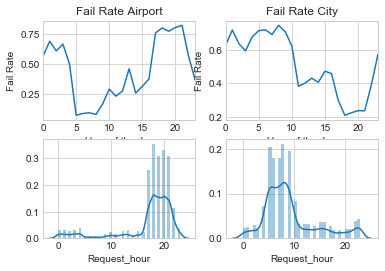

In [145]:
#subsetting Airport pick up data
data_airport = data[data["Pickup point"] == "Airport"]
time_df_airport = data_airport.groupby(["Request_hour"]).supply_bool.mean()
#subsetting city pick up data
data_city = data[data["Pickup point"] == "City"]
time_df_city = data_city.groupby(["Request_hour"]).supply_bool.mean()

#Plotting Fail rate and demand distribution across Pick up point and hours of the day
plt.subplot(2, 2, 1)
sns.tsplot(data= time_df_airport)
plt.ylabel("Fail Rate")
plt.xlabel("Hour of the day")
plt.title("Fail Rate Airport")
plt.subplot(2, 2, 2)
sns.tsplot(data= time_df_city)
plt.ylabel("Fail Rate")
plt.xlabel("Hour of the day")
plt.title("Fail Rate City")

plt.subplot(2, 2, 3)
sns.distplot(data_fail[data_fail['Pickup point'] == "Airport"].Request_hour)
plt.subplot(2, 2, 4)
sns.distplot(data_fail[data_fail['Pickup point'] == "City"].Request_hour)


Its intereseting to compare the trend across pick up point.

1. From midnight to early hours till 5 PM, the Fail rate is very high. for both Airport and City pick up.
2. Post 5 AM in the morning, the Fail rate trends for Airport Pick up and City pick up seems to have negative correlation.
3. We see Fail Rate for city pick up continues to remain high till 10 :00 AM whearas as Fail rate for Airport starts steep decrease during early morning hours and stabilises atits lowest around 5:00 AM.
4. From 10:00 AM onwards, Fail rate for Airport starts trending higher gradually, whears for citypick up it trends low sharply till 11:00 am and remains stable till 3:00 PM.
5. From 3:00 PM onwards, the fail_rate for Airport Pick up shoots up and stabilises at around at a very high of 80% and remains there till 9:00 PM. City pick up shows th opposite trend, where fail rate decreases sharply to almost 20% and remains stable till 9:00 PM.
6. Post 9:00 PM Fail Rate for Airport pick up dips sharply to 40%. For CIty pick up it rises steeply to around 60%.

Now that we know how the Fail Rate vary across pick up points, 
Lets analyse these failures closely across time and across Pick up point.

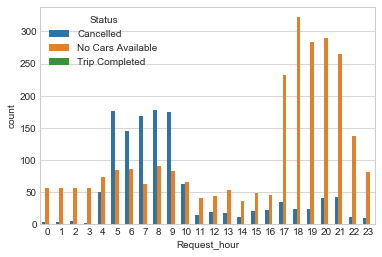

In [152]:
data_fail = data[data["supply"] == "fail"]
sns.countplot(x="Request_hour", hue="Status", data=data_fail )

We see from the plot above that the major cause of failure duinrg demand peak of 4:00 am 9:00 am is cancelleation, whereas for demand peak of 5:00PM to 11:00 pm is unavailaiblity of cars. Lets try to segment this by the pick up point.

Text(0.5,1,'Failure distribution for City pickup')

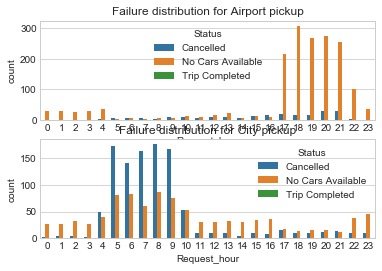

In [162]:
#creating subsets of relevant data for segemented analysis
data_fail_airport = data[(data["supply"] == "fail") & (data["Pickup point"] == "Airport")]
data_fail_city = data[(data["supply"] == "fail") & (data["Pickup point"] == "City")]

plt.subplot(2, 1, 1)
sns.countplot(x="Request_hour", hue="Status", data=data_fail_airport)
plt.title("Failure distribution for Airport pickup")
plt.subplot(2, 1, 2)
sns.countplot(x="Request_hour", hue="Status", data=data_fail_city)
plt.title("Failure distribution for City pickup")


# Summarise findings and recommendation 

We observe that Demand peak is dependent on Pick up point and hour of the day. The mornining Peak is for City and late evening and night peak is for Airport.
Lets summarise out observations with reference to our bussiness questions:
1. __Is there a Demand Supply Gap?__<br>
 _Yes_

2. __How big is the Gap?__<br>
_Overall the failure rate is 58%._<br>
_There are two demad peak where Fail rate is high in the range of 60-70%. The first one is 4:00 am to 9:00 am and second one is 5:00 pm to 10:00 pm_<br>

3. __Given the data, which events contribute to Gap and to what extent?__<br>
_Demand peaks contributes to most of the failures (exception to this is late night between 12:00 AM  to 4:00am)_ <br>
4. __How does the Gap vary across given factors like Pick UP location, time of the day.__<br>
_The demand peak across Pick up point is significant. The mornining Peak  is for City and late evening and night peak is for Airport._ <br> 
_For the morninig peak of the City major cause of failure is Cancelletion whereas wheras for night peak of Airport almost all failures are due to unavailability of Cars._ <br> 

5. __Recommendarion to the management to address the Gap__<br>

The morning spike in failure rate is mostly cancellation for City Pick up.  
We can hypothesis is that Driver’s are reluctant to come to Airport from City. As we observe in Slide 11(red filed portion) there is very low demand for Airport pick up during that time. The diver will have to wait for a pick up or he may have to drive back to city where he gets a booking. This means loss for driver in term of Time and Fuel).

Management may incentivise drivers who accept these pick ups by charging premium on Customer Fare and passing the differential to drivers.<br>

The night spike in failure rate is mostly unavailability of cars for Airport Pick up. 
Owing to low demand from City where We can give same argument as above and same recommendation. 
Other hypothesis could be that we have few drivers who do night shift. May recruit more drivers with higher incentives. Obviously charging the extra money to passenger fare.

Beside this we may also promote other avenue like allowing private cars to register in Ola for pooling. Obviously this might require regulatory permissions.





